In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

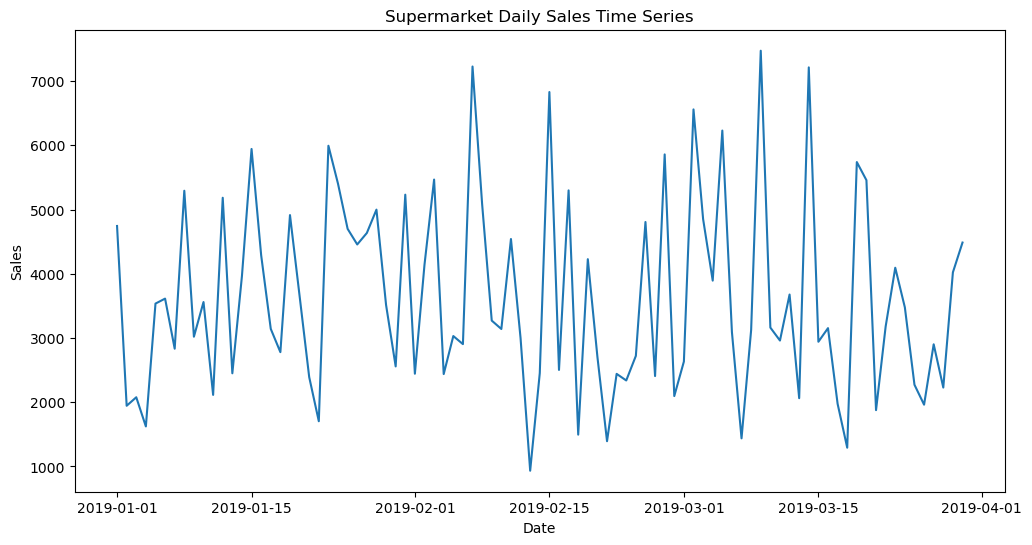

In [17]:
import pandas as pd

try:
    df = pd.read_csv("/Users/bahaarahuja/Desktop/supermarket_sales - Sheet1.csv")  # Use the correct path
except FileNotFoundError:
    print("Error: supermarket_sales - Sheet1.csv not found. Make sure the file is in the correct directory.")
    exit()

# Data Cleaning and Preprocessing
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract relevant features: Sales and Date
sales_data = df[['Date', 'Total']]
sales_data = sales_data.rename(columns={'Total': 'Sales'}) # Rename column for consistency

# Aggregate sales data by date (summing sales for each day)
daily_sales = sales_data.groupby('Date')['Sales'].sum()
daily_sales = pd.DataFrame(daily_sales) # Convert series to dataframe

# Visualize daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Sales'])
plt.title('Supermarket Daily Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


<Figure size 1200x800 with 0 Axes>

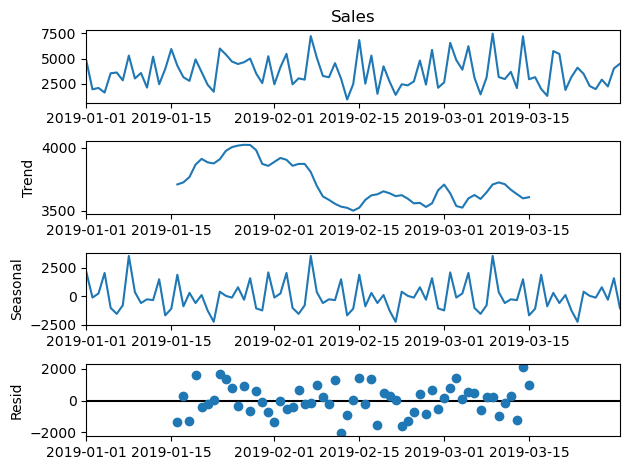

In [18]:
# Decompose the time series to observe trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_sales['Sales'], model='additive', period=30) # Assuming monthly seasonality

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [19]:
df = pd.read_csv("/Users/bahaarahuja/Desktop/supermarket_sales - Sheet1.csv", parse_dates=['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()  # Extract weekday
df['Hour'] = pd.to_datetime(df['Time']).dt.hour  # Extract hour of sale
df['Month'] = df['Date'].dt.month_name()

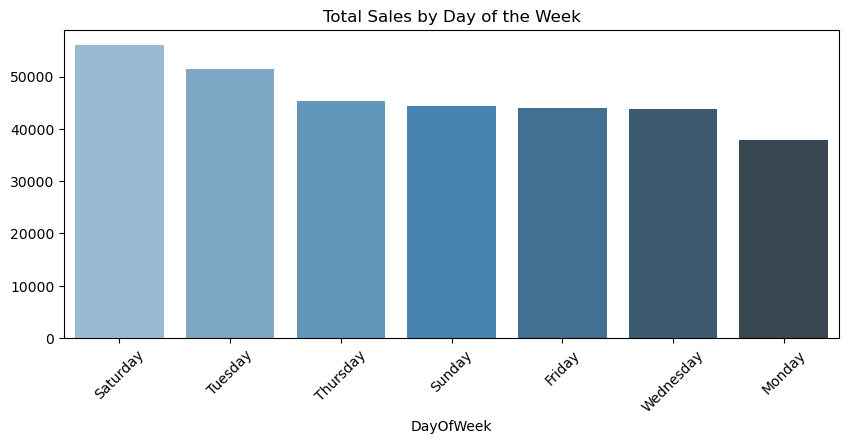

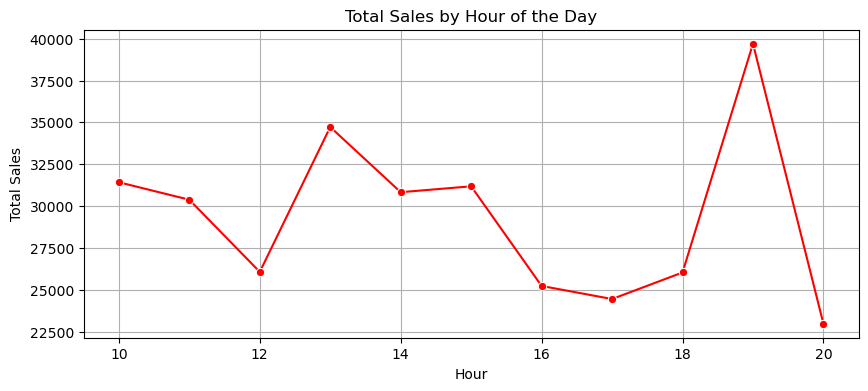

In [20]:
# Group by day and hour to find peak sales times
sales_by_day = df.groupby('DayOfWeek')['Total'].sum().sort_values(ascending=False)
sales_by_hour = df.groupby('Hour')['Total'].sum()

# Plot sales trends
plt.figure(figsize=(10,4))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="Blues_d")
plt.title("Total Sales by Day of the Week")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker="o", color="red")
plt.title("Total Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


In [21]:
# Find the top-selling product lines
top_products = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Show top 5 products
print("Top-Selling Product Lines:\n", top_products.head())

# Suggest restocking based on demand
stock_advice = f"Based on peak sales periods, consider increasing stock for {top_products.index[0]} during {sales_by_day.index[0]} afternoons."
print(stock_advice)


Top-Selling Product Lines:
 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Name: Total, dtype: float64
Based on peak sales periods, consider increasing stock for Food and beverages during Saturday afternoons.
